In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [2]:
train_d=pd.read_csv('Train_Kaggle.csv')
df=pd.read_csv('Train_Kaggle.csv')
train_d.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [3]:
## replace nan with mean of month in all years #Not good
##https://chrisalbon.com/python/data_wrangling/pandas_missing_data/
#train_d["Sales(In ThousandDollars)"].fillna(train_d.groupby("Month")["Sales(In ThousandDollars)"].transform("mean"), inplace=True)

In [4]:
#Droping all nan
train_d=train_d.dropna()

In [5]:
#train_d[train_d['Month']==4]

In [6]:
WC=train_d[train_d['ProductCategory']=='WomenClothing']
WC=WC.drop(['ProductCategory'],axis=1)
WC.head()

#plt.plot(WC['Month'],WC['Sales(In ThousandDollars)'])

,Year,Month,Sales(In ThousandDollars)
0,2009,1,1755.0
3,2009,2,1729.0
6,2009,3,2256.0
9,2009,4,2662.0
12,2009,5,2732.0


In [7]:
temp=WC['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[ '01','02','03','04','05','06','07','08','09','10','11','12'])
#print(WC.head())
WC['Month']=temp
WC['Y-M']=WC['Year'].astype(str)+WC['Month'].astype(str)

#WC.drop['Year','Month']
WC.head()

,Year,Month,Sales(In ThousandDollars),Y-M
0,2009,01,1755.0,200901
3,2009,02,1729.0,200902
6,2009,03,2256.0,200903
9,2009,04,2662.0,200904
12,2009,05,2732.0,200905


In [8]:
WC.head()

,Year,Month,Sales(In ThousandDollars),Y-M
0,2009,01,1755.0,200901
3,2009,02,1729.0,200902
6,2009,03,2256.0,200903
9,2009,04,2662.0,200904
12,2009,05,2732.0,200905


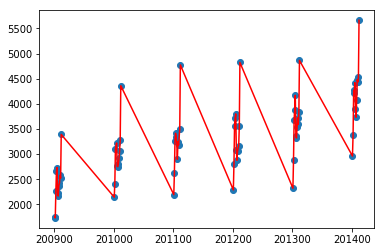

In [9]:
plt.scatter(WC['Y-M'].astype(int),WC['Sales(In ThousandDollars)'])
plt.plot(WC['Y-M'].astype(int),WC['Sales(In ThousandDollars)'],c='r')
plt.show()

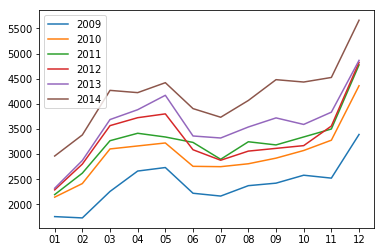

In [10]:
for each in WC['Year'].unique():
    temp=WC[WC['Year']==each]
    plt.plot(temp['Month'],temp['Sales(In ThousandDollars)'])
plt.gca().legend(WC['Year'].unique())
plt.show()

# First linear regession  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
WC_y=WC['Sales(In ThousandDollars)']
WC_X=WC['Y-M']

lm=LinearRegression()

X_train,X_test,Y_train,Y_test=train_test_split(WC_X.values.reshape(-1, 1) ,WC_y.values,test_size=0.2)
lm.fit(X_train,Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)
#MSE
print('Train MSE=',np.sqrt((np.sum((Y_train - pred_train) ** 2))/len(Y_train)))
print('Test MSE=',np.mean((Y_test-pred_test) ** 2))
#with only Y-M
#Train MSE= 340061.2734387238
#Test MSE= 366476.98359972646

#SVM
from sklearn.svm import SVR
clf = SVR( epsilon=0.2)
clf.fit(X_train, Y_train) 
pred_train=clf.predict(X_train)
pred_test=clf.predict(X_test)
print('Train MSE=',np.mean((Y_train - pred_train) ** 2))
print('Test MSE=',np.mean((Y_test-pred_test) ** 2))

In [11]:
temp=train_d['ProductCategory'].replace(['WomenClothing','MenClothing','OtherClothing'],[1,2,3])
train_d['ProductCategory']=temp


In [12]:
train_d.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,1,1755.0
1,2009,1,2,524.0
2,2009,1,3,936.0
3,2009,2,1,1729.0
4,2009,2,2,496.0


In [13]:
ally=train_d['Sales(In ThousandDollars)']
allx=train_d[['Year','Month','ProductCategory']]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(allx.values,ally.values,test_size=0.2)
#lm.fit(X_train,Y_train)
#pred_train=lm.predict(X_train)
#pred_test=lm.predict(X_test)
#print('Train MSE=',np.mean((Y_train - pred_train) ** 2))
#print('Test MSE=',np.mean((Y_test-pred_test) ** 2))

# Final Model
# 36 models train for each category(3), for each month (12) 


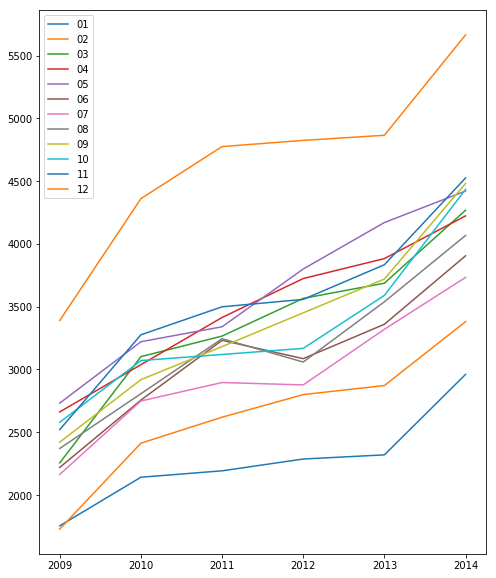

In [15]:
# in this model we want to seperate month price w.r.t year
plt.figure(figsize=(8,10))
for each in WC['Month'].unique():
    temp=WC[WC['Month']==each]
    plt.plot(temp['Year'],temp['Sales(In ThousandDollars)'])
plt.gca().legend(WC['Month'].unique())
plt.show()
#WC.head()

In [16]:
# MSE is 214.67151, which is an improvement of your previous score of 227.33504.when nan values are removed.
for each in df[df['Sales(In ThousandDollars)'].isnull()].index.values.tolist():
    df.loc[each,'Sales(In ThousandDollars)']=0.5*(df.loc[each-3,'Sales(In ThousandDollars)']+df.loc[each+3,'Sales(In ThousandDollars)'])


In [17]:
#df=df.dropna()
df_1=df[df['ProductCategory']=='WomenClothing']
df_2=df[df['ProductCategory']=='MenClothing']
df_3=df[df['ProductCategory']=='OtherClothing']

#max-

In [18]:
#poly feature 279
#RBF=266

x_1=[]
y_1=[]
lr_1=[]
for each in range(12):
    x_1.append('x'+str(each))
    y_1.append('y'+str(each))
    lr_1.append('lr'+str(each))

for i in range(12):
    #print(i)
    x_1[i]=df_1[df_1['Month']== i+1]['Year']
    y_1[i]=df_1[df_1['Month']== i+1]['Sales(In ThousandDollars)']
    #print(x[i].shape)
    #lr_1[i]= Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
    #lr_1[i]=SVR(kernel='poly', C=1e3, degree=3)
    lr_1[i]=SVR(kernel='rbf', C=1e3, gamma=0.1)
    lr_1[i].fit(x_1[i].values.reshape(-1,1),y_1[i].values)

x_2=[]
y_2=[]
lr_2=[]
for each in range(12):
    x_2.append('x'+str(each))
    y_2.append('y'+str(each))
    lr_2.append('lr'+str(each))

for i in range(12):
    #print(i)
    x_2[i]=df_2[df_2['Month']== i+1]['Year']
    y_2[i]=df_2[df_2['Month']== i+1]['Sales(In ThousandDollars)']
    #print(x[i].shape)
    #lr_2[i]= Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
    #svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    #svr_lin = SVR(kernel='linear', C=1e3)
    #lr_2[i] = SVR(kernel='poly', C=1e3, degree=3)
    lr_2[i]=SVR(kernel='rbf', C=1e3, gamma=0.1)
    lr_2[i].fit(x_2[i].values.reshape(-1,1),y_2[i].values)
    
x_3=[]
y_3=[]
lr_3=[]
for each in range(12):
    x_3.append('x'+str(each))
    y_3.append('y'+str(each))
    lr_3.append('lr'+str(each))

for i in range(12):
   # print(i)
    x_3[i]=df_3[df_3['Month']== i+1]['Year']
    y_3[i]=df_3[df_3['Month']== i+1]['Sales(In ThousandDollars)']
    #print(x[i].shape)
    #lr_3[i]= Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
    #lr_3[i]=SVR(kernel='poly', C=1e3, degree=3)
    lr_3[i]=SVR(kernel='rbf', C=1e3, gamma=0.1)
    lr_3[i].fit(x_3[i].values.reshape(-1,1),y_3[i].values)


In [19]:
testdata=pd.read_csv('Test_Kaggle.csv')

In [20]:
testdata.head()


,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [21]:
#testdata.values

In [22]:
fil=open('subv_svr_rbf.csv','w')
fil.write('Year,Sales(In ThousandDollars)\n')
i=1
for each in testdata.values:
    if each[2]=='WomenClothing':
        fil.write('%d,%d\n'%(i,lr_1[each[1]-1].predict(each[0])))
    if each[2]=='MenClothing':
        fil.write('%d,%d\n'%(i,lr_2[each[1]-1].predict(each[0])))
    if each[2]=='OtherClothing':
        fil.write('%d,%d\n'%(i,lr_3[each[1]-1].predict(each[0])))
    i=i+1
fil.close()

s=0
for e in range(len(pred)):
    s=s+(pred[e]-Y_test[e])**2
print(np.sqrt(s/len(pred)))

In [23]:
weather_d=pd.read_csv('Weather_Data_Head.csv')
weather_d
#weather_d.tail()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


events_d=pd.read_csv('Event_Holiday_Head.csv')
events_d

macro_d=pd.read_csv('MacroEconomic_Data_Head.csv')
macro_d

#attri=pd.read_excel('AttributesDescription.xlsx')